In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Percentiles

In [ ]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [ ]:
# Step 1. Sort the data
np.sort(x)

In [ ]:
# Step 2. Figure out where 55th percentile would be.
# The Xth percentile is first value on the sorted list that is at least as large as X% of the elements 

In [ ]:
# OR: 1 Line of Code using percentile()
percentile(55, x)

(back to slides)
## Percentiles questions

In [ ]:
s= [1, 7, 3, 9, 5]

In [ ]:
#1 
percentile(10, s) == 0

In [ ]:
# 2 
percentile(39, s) == percentile(40, s)

In [ ]:
# 3
percentile(40, s) == percentile(41, s) 

In [ ]:
# 4
percentile(50, s) == 5 

# Estimation

### Sample Median

In [3]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2


**Question:** What is this dataset?

In [4]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,117767
"Public Works, Transportation & Commerce",Soft Floor Coverer,41209.8
Community Health,Health Care Billing Clerk 2,110561
Community Health,Food Service Mgr Administrator,38625
"Public Works, Transportation & Commerce",School Crossing Guard,11438.2
Public Protection,Police Officer,3188.65
Community Health,Nurse Practitioner,260281
"Public Works, Transportation & Commerce",Transit Operator,111057
General Administration & Finance,Attorney (Civil/Criminal),186781
Human Welfare & Neighborhood Development,Emp & Training Spec 2,103610


**Question:** Who is making the most money?

In [6]:
max_comp = max(salary_sf.column('Total Compensation'))
salary_sf.where('Total Compensation', max_comp)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,648875


**Question:** Who is making the least money?

**Question:** How many people are making less than $10,400 a year?

**Question:** What is the typical salary? Should we compute the mean or median for this?

In [ ]:
# answer below











In [ ]:
# skip

How can we compute the median with what we covered today?
<details>
<summary>Solution</summary>
  percentile(50, sf.column('Total Compensation'))
</details>  

In [ ]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

In [ ]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

### Estimating Salaries
Say we dont have salaries. What would we do to compute the 50% percentile of salaries?

*Zoom poll*

In [ ]:
# skip
#skip










In [ ]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

In [ ]:
estimate_median = percentile(50, our_sample.column('Total Compensation'))
estimate_median

In [ ]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

**Question:** How far off is our estimate from the true median?

In [ ]:
pop_median, estimate_median, abs(pop_median - estimate_median)

(back to slides)

## Variability of the Estimate

Let's implement the following function:

<details>
<summary>Solution</summary>
  our_sample = sf.sample(samp_size, with_replacement=False)
  return percentile(50, our_sample.column('Total Compensation'))
</details>


In [ ]:
def generate_sample_median(samp_size):
    """
    Given a sample size
    Returns the median of a random sample of samp_size from the sf table"""
    # Question: sample with or without replacement?

sample_median = generate_sample_median(300)
sample_median

**Question:** What is our error?


<details>
<summary>Solution</summary>
  error = sample_median - pop_median
</details>



In [ ]:
error = ...
error

(back to slides)
# Quantifying Uncertainty

In [9]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)
sample_medians

NameError: name 'generate_sample_median' is not defined

/opt/anaconda3/envs/bc-coms-1016/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


NameError: name 'pop_median' is not defined

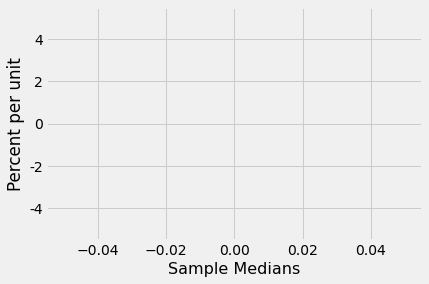

In [15]:
med_bins = np.arange(90000, 125001, 2500)

Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

In [ ]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

(back to slides)
# Bootstrap

In [11]:
# Take a bootstrap (re)sample of size 300, WITH replacement

# Sample from our sample
boot_sample = ...
boot_sample

Ellipsis

In [ ]:
# Show the bootstrap sample 
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

### Multiple Bootstraps
Let's take 1k bootstraps. Lets start by implementing the following function

<details>
<summary>Solution</summary>
   single_sample = our_sample.sample()
   return percentile(50, single_sample.column('Total Compensation'))
</details>  

In [12]:
def one_bootstrap_median():
    single_sample = ...
    return percentile(...)

Now let's keep track of 1k bootstrapped median

In [13]:
# Bootstrap our sample 1000 times
bootstrap_medians = ...
for i in np.arange(1000):
    new_median = ...
    bootstrap_medians = ...

Let's visualize these bootstrapped medians

TypeError: '<' not supported between instances of 'ellipsis' and 'float'

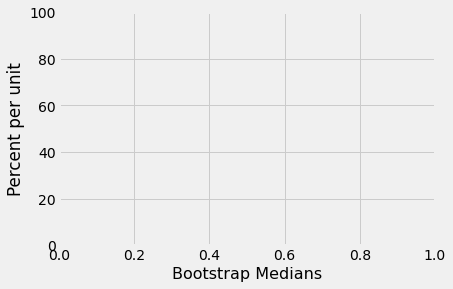

In [16]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

# 95% Confidence Interval

**Question**: How could we make an interval based on the middle 95% of bootstrap samples?

- *Hint 1:* Remember we stored the bootstrapped medians in an array called `bootstrap_medians`
- *Hint 2:* What did we learn about in the begining of this lecture?


<details>
<summary>Solution</summary>
  left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
</details>  

In [ ]:
# Make an interval based on the middle 95% of bootstrap samples

left = ...
right = ...

Let's now run the code below to plot the confidence interval

In [ ]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [17]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


How can we see a distribution of maternal ages?

<details>
<summary>Solution</summary>
  births.hist('Maternal Age')
</details>  

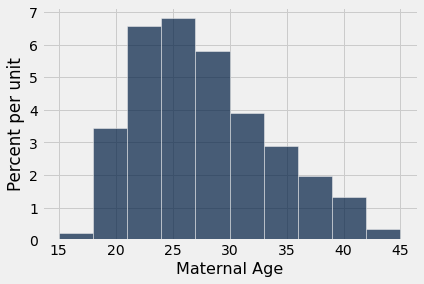

What is the mean age?

In [19]:
mean_age = ...
mean_age

Ellipsis

Now let's use bootstraping to find samples means

<details>
<summary>Solution</summary>
  np.mean(births.sample().column('Maternal Age'))
</details>  

In [20]:
def one_bootstrap_mean():
    return ...

Let's compute 1k bootstrapped samples

In [21]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

TypeError: '<' not supported between instances of 'ellipsis' and 'ellipsis'

Now let's plot the bootstrapped means

TypeError: '<=' not supported between instances of 'ellipsis' and 'ellipsis'

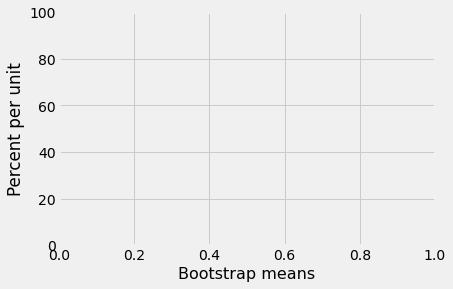

In [23]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');